In [1]:
# Symbolic math package
import sympy as sp
sp.init_printing()
# Custom convenience function
from sympyutils import show
# Matlab-like package
import numpy as np
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Angled flow past cylinder with Backspin<sup>TM</sup>

## Math

This kind of flow is obtained by combining a vortex centered at the origin as well as angled flow past a cylinder.

### Stream Function
As shown in the handwritten notes, the stream function is given by:
\begin{align}
\Psi &= \Psi_{CWAF} + \Psi_{vortex} + C\\
 \text{where} \quad\Psi_{CWAF} &= U\big[r - \frac{a^2}{r}\big]\sin(\theta - \alpha)\\
 \Psi_{vortex} &= \frac{\Gamma}{2\pi}\log(r)
\end{align}
notice that we added a constant $C$. We'll use this for convenience to make the value of the stream function around the cylinder to be equal to 0. In other words:
\begin{gather}
\text{Find}~C ~\text{such that}~ \Psi\big|_{r=a} = 0\\
\Psi\big|_{r=a} = \frac{\Gamma}{2\pi}\log(a) + C = 0 \quad\Rightarrow\quad C = -\frac{\Gamma}{2\pi}\log{a}
\end{gather}
We can then write our new stream function as:
$$
\Psi = U\left[r - \frac{a^2}{r}\right]\sin(\theta - \alpha) + \frac{\Gamma}{2\pi}\log\left(\frac{r}{a}\right)
$$

### Velocity

The $r$ and $\theta$ components of the velocity are found like so:
\begin{align}
u_r &= \frac{1}{r}\frac{\partial\Psi}{\partial\theta}\\
u_\theta &= -\frac{\partial\Psi}{\partial r}
\end{align}

We're going to use the **sympy** package from now on.

In [2]:
U, r, a, theta, alpha, gam = sp.symbols('U r a theta alpha Gamma', real=True, positive=True)
Scwaf = U*(r - a**2/r)*sp.sin(theta - alpha)
Svortex = gam/(2*sp.pi)*sp.log(r/a)
S = Scwaf + Svortex
show(S, '\Psi')

<IPython.core.display.Math object>

Sometimes **sympy** does weird stuff, but the expression is the same as above. 

In [3]:
ur = (1/r)*sp.diff(S, theta)
ut = -sp.diff(S, r)
show(ur, 'u_r')

<IPython.core.display.Math object>

In [4]:
show(ut, 'u_{\\theta}')

<IPython.core.display.Math object>

Let's also find the values of the velocity at the surface of the cylinder. This will be useful later. 

In [5]:
surface = [(r, a)]
ur_surface = ur.subs(surface)
show(ur_surface, 'u_r\\big|_{r=a}')

<IPython.core.display.Math object>

In [6]:
ut_surface = ut.subs(surface)
show(ut_surface, 'u_\\theta\\big|_{r=a}')

<IPython.core.display.Math object>

### Stagnation Points

We now seek the stagnation points for this flow. We expect that, for low enough $\Gamma$, the stagnation points will be located on the surface of the cylinder. This simplifies our task since, as shown above, $u_r$ is zero at the surface. Let's ask **sympy** to solve for the value of $\theta$ at stagnation points.

In [7]:
tstag = sp.solve(ut_surface, theta)
show(tstag, '\\theta_{s}')

<IPython.core.display.Math object>

Let's perform a *sanity check*: we expect $\theta_{s}\big|_{\Gamma = \alpha = 0} = \{0, \pi\}$.

In [8]:
hnbs = [(gam, 0), (alpha, 0)]  # Conditions for horizontal flow without backspin
show(
    [x.subs(hnbs) for x in tstag], 
    '\\theta_{s}\\big|_{\\Gamma = \\alpha = 0}'
)

<IPython.core.display.Math object>

Cool. Let's see how $\Gamma$ affects $\theta_s$ now. It's easier to non-dimensionalize $\Gamma$ and write $\theta_s$ as:
$$
\theta_s = \left\{\alpha - \operatorname{asin}\left(\chi\right), \alpha + \operatorname{asin}\left(\chi\right) - \pi\right\}
$$

Let's plot this!

In [31]:
CHI = np.linspace(0, 2, 201)
TSTAG = [-np.arcsin(CHI), np.arcsin(CHI) - np.pi]

/home/selimb/miniconda/envs/science/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


What just happened? Well **numpy** is complaining because there is no real solution for $\operatorname{asin}(\chi), ~\chi > 1$. Let's ignore this for now.

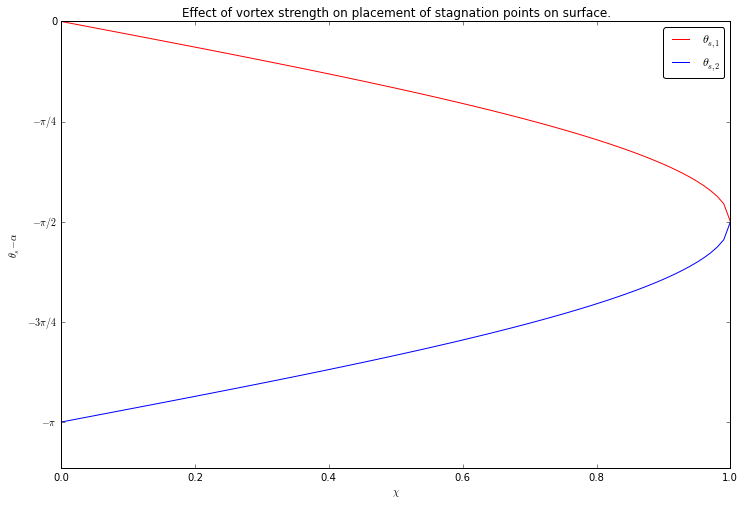

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(CHI, TSTAG[0], 'r', label='$\\theta_{s,1}$')
ax.plot(CHI, TSTAG[1], 'b', label='$\\theta_{s,2}$')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\theta_s - \\alpha$')
ax.legend(fancybox=True, loc='best')
# Beautiful y axis
yticks = np.linspace(0, 1, 5)*-np.pi
ax.set_yticks(yticks)
ax.set_yticklabels(['0', '$-\\pi/4$', '$- \\pi/2$', '$- 3\\pi/4$', '$- \\pi$'])
ax.set_title('Effect of vortex strength on placement of stagnation points on surface.')
plt.show()

This confirms what we saw in class: the stagnation points move symmetrically towards the "bottom" of the cylinder, at which point there is but one stagnation point.

But, what happens when $\chi > 1$? Well, we made an assumption earlier that the stagnation points would be on the cylinder! As we see here, that assumption breaks down for large enough $\Gamma$. To find the expression for these stagnation points, we require some intuition. 

Let $r > a$, let's start by finding $\theta_s = \left\{\theta ~\big| ~u_r = 0\right\} $

In [11]:
ts = sp.solve(ur, theta)
show(ts, '\\theta_s')

<IPython.core.display.Math object>

This is what we obtained in class -- without the $\alpha$ and with positive angles.

Now let's find $r_s = \left\{r ~\big| ~u_\theta\big|_{\theta=\theta_s} = 0\right\} $

In [12]:
rs = [sp.solve(ut.subs(theta, t), r, simplify=True) for t in ts]
show(rs, 'r_s')

<IPython.core.display.Math object>

Nasty. Alright now let's plug in $\Gamma = 2\cdot(4\pi U a)$ and see which ones satisfy $\dfrac{r_s}{a} > 1$.

In [13]:
rs2 = [r.subs(gam, 2*(4*sp.pi*U*a)).simplify() 
       for rpair in rs for r in rpair]
show(rs2, 'r_s\\big|_{\chi=2}')

<IPython.core.display.Math object>

In [14]:
valid = [sp.Gt(r/a, 1) for r in rs2]
valid

So the only valid answer is the very last expression.

In [15]:
rsvalid = rs[1][1]
show(rsvalid, 'r_s')

<IPython.core.display.Math object>

Note that it does not depend on $\alpha$, as that would be ridiculous. However, $\theta_s$ *does* depend on $\alpha$.

Just for fun, let's see what that plot looks like. Again, we non-dimensionalize $\Gamma$ with the following:
$$
\chi = \frac{\Gamma}{4\pi U a}
$$
and we don't really care about the actual value of $a$, so really we seek an expression
$$
R(\chi) = \frac{r_s}{a}
$$

In [20]:
chi = sp.symbols('chi')
R = (rsvalid.subs(gam, chi*4*sp.pi*U*a)/a).simplify()
show(R, 'R')

<IPython.core.display.Math object>

Awesome expression, don't you think? Let's plot this just for the hell of it.

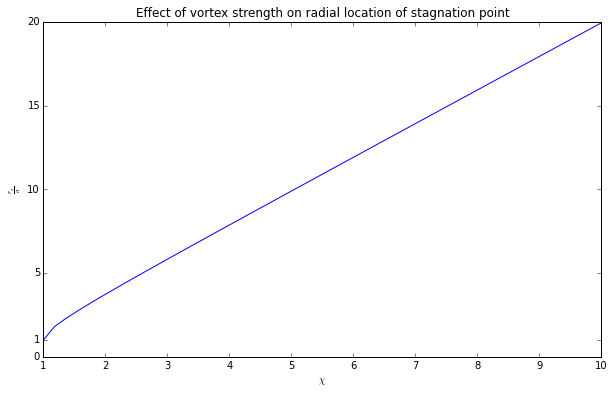

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
CHI = np.linspace(1, 10)
Rvals = CHI + np.sqrt(CHI**2 -1)
R0 = Rvals[0]
ax.plot(CHI, Rvals)
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\frac{r_s}{a}$')
yticks = ax.get_yticks()
yticks = np.append(yticks, Rvals[0])
ax.set_yticks(yticks)
ax.set_title('Effect of vortex strength on radial location of stagnation point')
plt.show()